In [180]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV

In [181]:
mb_t=pd.read_csv('/Users/bonnyma/Downloads/archive (3)/train.csv', delimiter=';', quotechar='"')
mb_t

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [182]:
mb_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [183]:
mb_t.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [184]:
job_modes = mb_t.groupby('job')['education'].agg(lambda x: x.mode().iloc[0]).reset_index()

for index, row in job_modes.iterrows():
    job = row['job']
    mode_education = row['education']
    mb_t.loc[mb_t['job'] == job, 'education'] = mode_education

In [185]:
mb_t

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,tertiary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,secondary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,secondary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


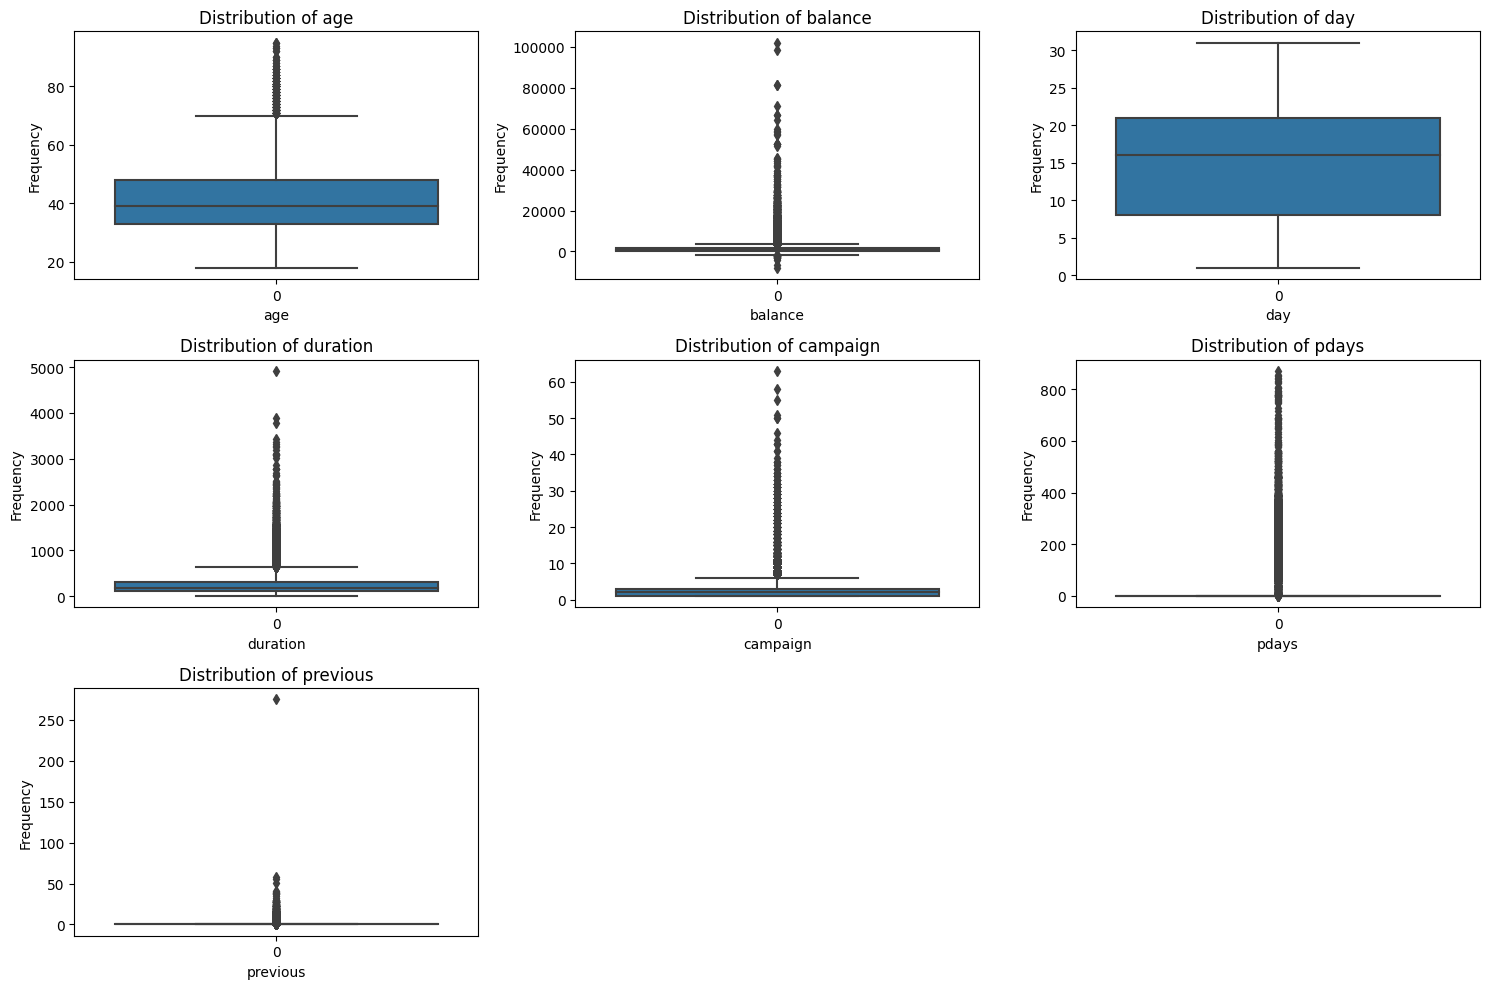

In [186]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plotting the distributions for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(mb_t[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [187]:
mb_t = mb_t[mb_t['duration'] != 4918]

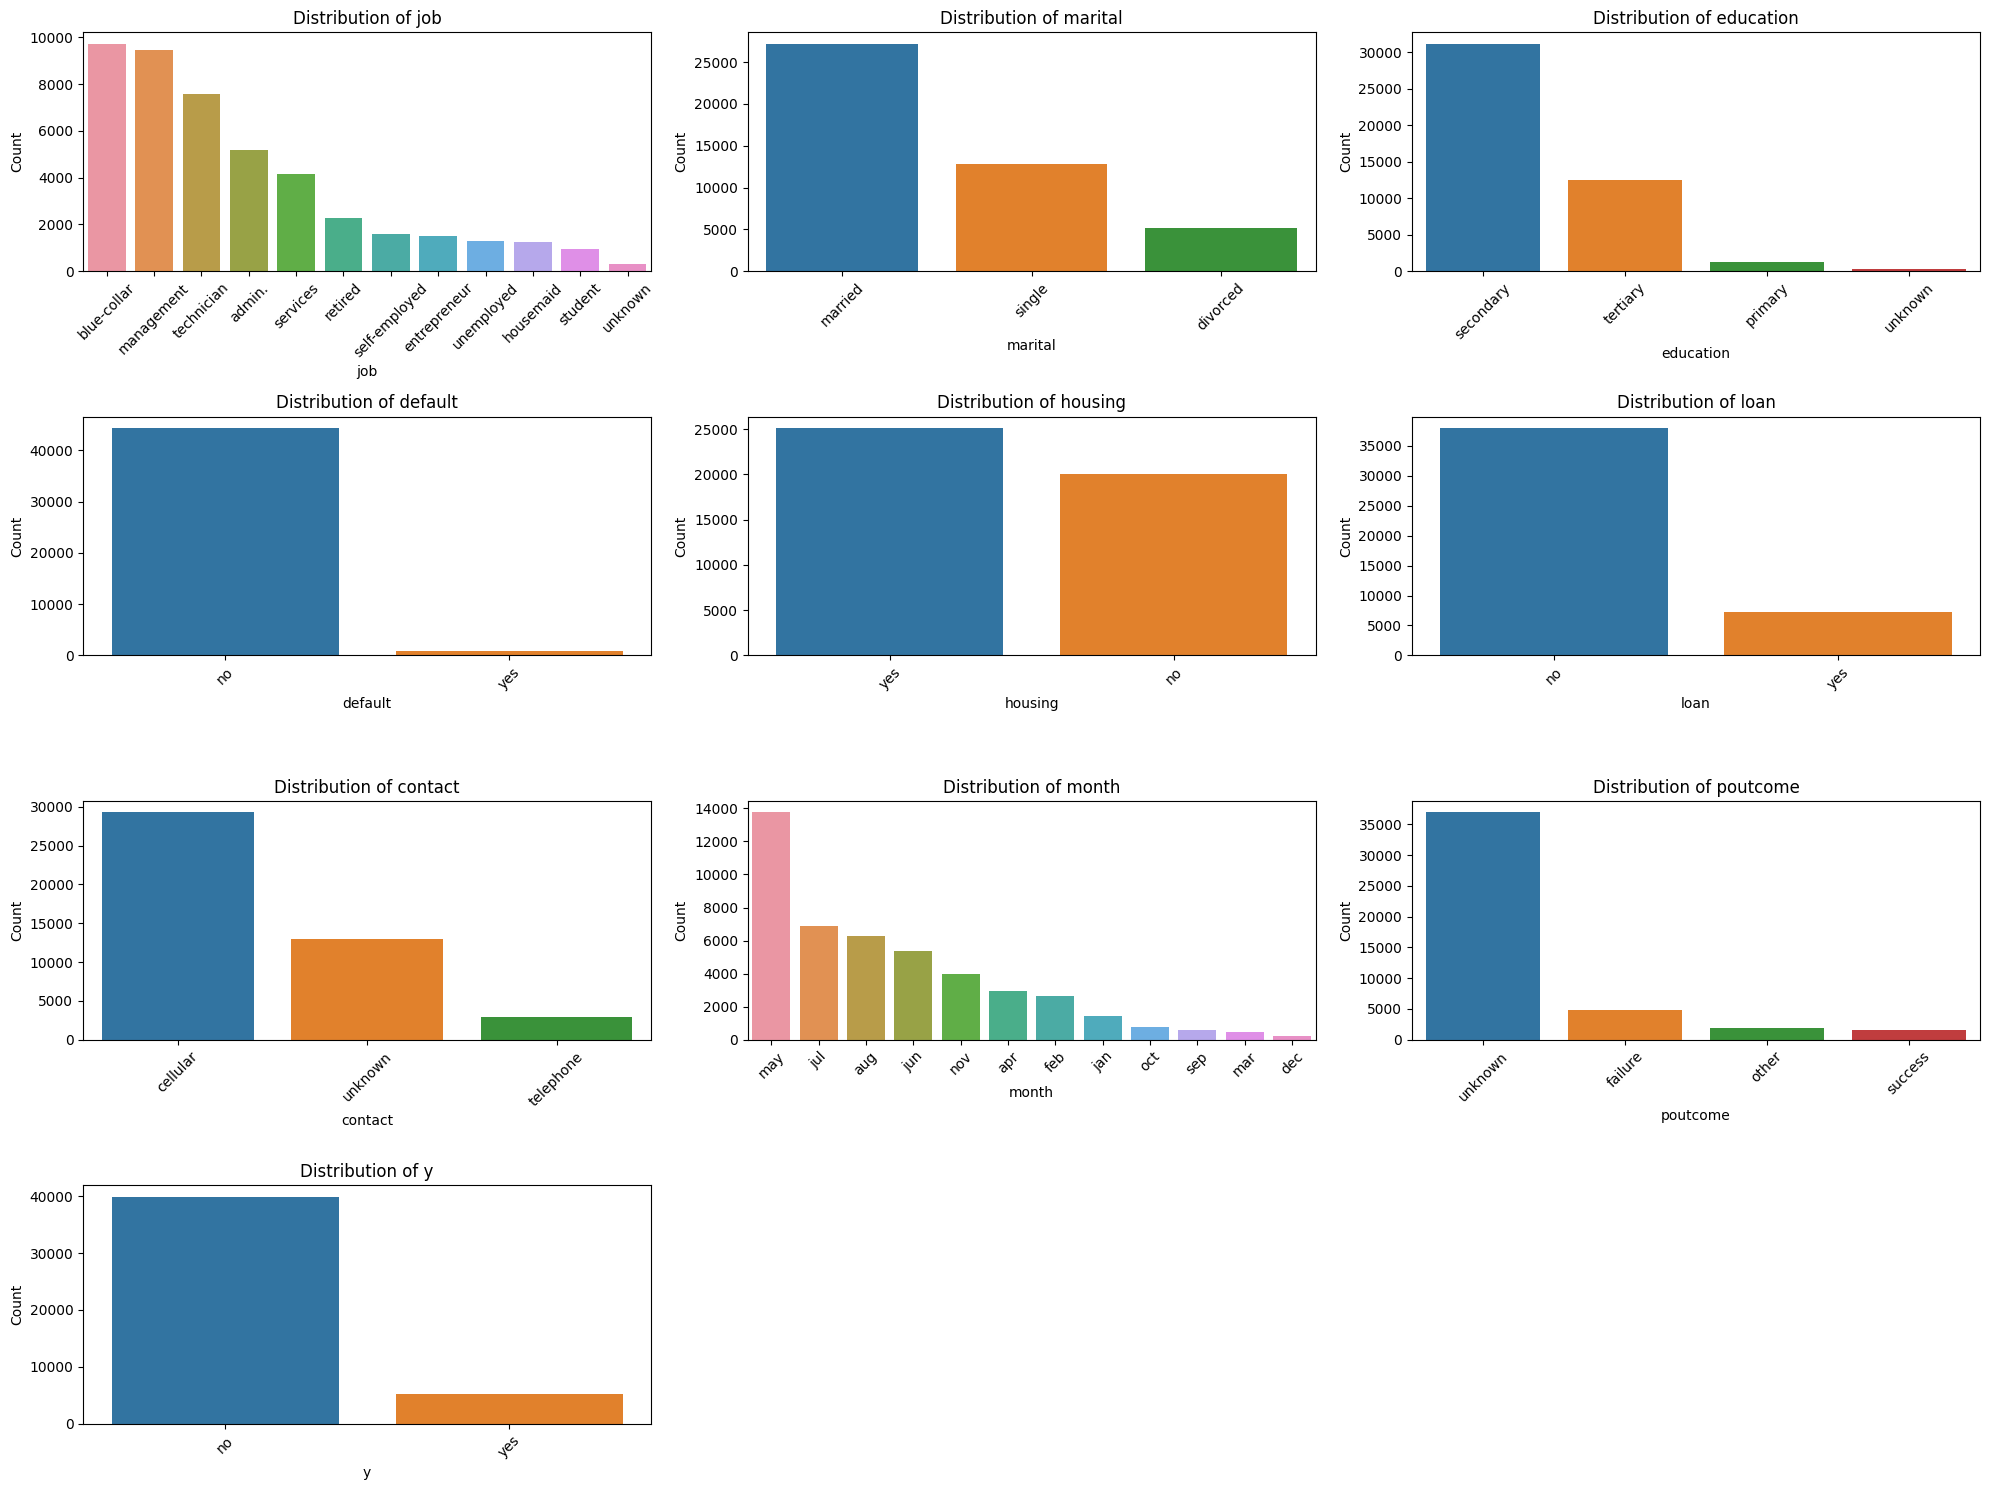

In [188]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Plotting the distributions for categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, data=mb_t, order=mb_t[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [189]:
marital_count=mb_t['marital'].value_counts()
marital_count

marital
married     27213
single      12790
divorced     5207
Name: count, dtype: int64

In [190]:
contact_count=mb_t['contact'].value_counts()
contact_count

contact
cellular     29285
unknown      13020
telephone     2905
Name: count, dtype: int64

In [191]:
non_unknown_count = mb_t['contact'].value_counts().drop('unknown')
percentage_distribution = non_unknown_count / non_unknown_count.sum()

np.random.seed(42) 
replacement_values = np.random.choice(percentage_distribution.index, size=(mb_t['contact'] == 'unknown').sum(), p=percentage_distribution)

# Replace 'unknown' values with the generated values
mb_t.loc[mb_t['contact'] == 'unknown', 'contact'] = replacement_values

In [192]:
job_count=mb_t['job'].value_counts()
job_count

job
blue-collar      9732
management       9458
technician       7596
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [193]:
mb_t=mb_t[mb_t['job'] != 'unknown']


In [194]:
job_count_c=mb_t['job'].value_counts()
job_count_c

job
blue-collar      9732
management       9458
technician       7596
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [195]:
poutcome_count=mb_t['poutcome'].value_counts()
poutcome_count

poutcome
unknown    36703
failure     4881
other       1838
success     1500
Name: count, dtype: int64

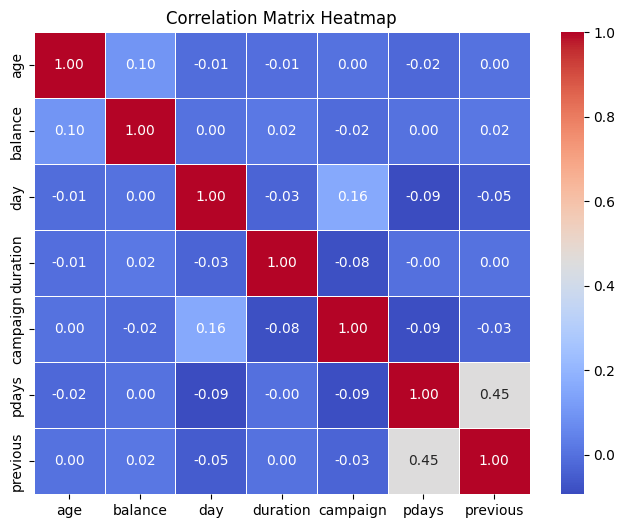

In [196]:
numeric_columns = mb_t.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

(array([3.7258e+04, 2.2860e+03, 2.1430e+03, 1.8210e+03, 1.2280e+03,
        9.7000e+01, 3.9000e+01, 1.7000e+01, 1.8000e+01, 1.5000e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

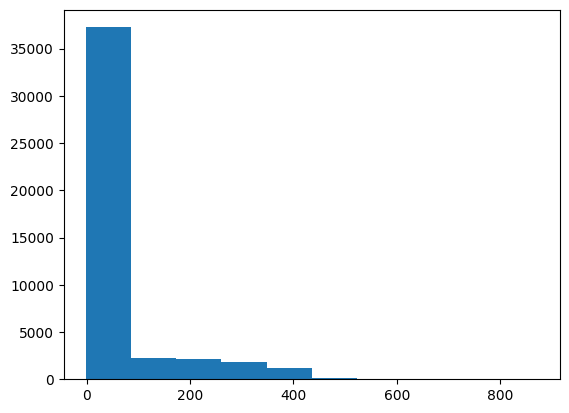

In [197]:
plt.hist(mb_t['pdays'])

In [198]:
non_unknown_counts = mb_t['poutcome'].value_counts().drop('unknown')
percentage_distribution = non_unknown_counts / non_unknown_counts.sum()

# Generate random samples based on the distribution
np.random.seed(42)  # Set a seed for reproducibility
replacement_values = np.random.choice(percentage_distribution.index, size=(mb_t['poutcome'] == 'unknown').sum(), p=percentage_distribution)

# Replace 'unknown' values with the generated values
mb_t.loc[mb_t['poutcome'] == 'unknown', 'poutcome'] = replacement_values

In [199]:
poutcome_count=mb_t['poutcome'].value_counts()
poutcome_count

poutcome
failure    26710
other      10063
success     8149
Name: count, dtype: int64

In [200]:
mb_t['y'] = mb_t['y'].map({'yes': 1, 'no': 0})

In [201]:
mb_t

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,0
1,44,technician,single,secondary,no,29,yes,no,telephone,5,may,151,1,-1,0,success,0
2,33,entrepreneur,married,tertiary,no,2,yes,yes,cellular,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,other,0
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,secondary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,1
45207,71,retired,divorced,secondary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,other,0


## Exploratory Data Analysis

After first explory the data set I have noticed that the dataset contains a lot of 'unknown' values, in order to get better model prediction, I will replace the 'unknown' value. For job column, I use the the education as a indicator for job, people with similar education background will more likely have same job category, and if it still is unknown, I choose to drop it directly(it's less than 1%). For poutcome and contact column, I randomly fill the value to keep the distribution percentage same of each value in the column. In addition, the dataset is imbalanced so I keep most of the outlier, but just drop the extreme cases, the one with 4918 seconds of duration.

In [202]:
x=mb_t[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
y=mb_t['y']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [204]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign','pdays','previous']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['marital','education', 'default','housing','loan','contact','month','poutcome'])])

In [205]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed= preprocessor.fit_transform(X_test)

In [206]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [233]:
start_time = time.time()

In [207]:
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
log_reg_params = {'C': [0.1, 1, 10]}

In [208]:
knn = KNeighborsClassifier()
log_reg =LogisticRegression()

In [209]:
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='precision')
randomsearch_reg= RandomizedSearchCV(log_reg, log_reg_params, cv=10, scoring='precision')

In [210]:
randomsearch_knn.fit(X_train_transformed, y_train)
randomsearch_reg.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1, 10]},
                   scoring='precision')

In [211]:
print("Best parameters for KNN: ", randomsearch_knn.best_params_)
print("Best parameters for log: ", randomsearch_reg.best_params_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 35}
Best parameters for log:  {'C': 0.1}


In [212]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
reg_best = LogisticRegression(**randomsearch_reg.best_params_)

In [213]:
knn_best.fit(X_train_transformed, y_train)


KNeighborsClassifier(n_neighbors=35, weights='distance')

In [214]:
reg_best.fit(X_train_transformed, y_train)

LogisticRegression(C=0.1)

In [234]:
end_time = time.time()

In [235]:
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Time elapsed: 32.414700984954834 seconds


In [215]:
y_pred_knn = knn_best.predict(X_test_transformed)
y_pred_reg = reg_best.predict(X_test_transformed)

In [232]:
print("Test precision for KNN: ", precision_score(y_test, y_pred_knn))
print("Test precision for log: ", precision_score(y_test, y_pred_reg))

Test precision for KNN:  0.689908256880734
Test precision for log:  0.6325581395348837


In [217]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn),('rf',rf)])

In [218]:
rf_params = {'n_estimators': list(range(1,100)), 'max_depth': [None, 10, 20, 30, 50]}
ada_params = {'n_estimators': list(range(1,100))}
bag_params = {'n_estimators': list(range(1,100))}
voting_params = {'voting': ['hard', 'soft']}

In [219]:
random_rf = RandomizedSearchCV(rf, rf_params, cv=10, scoring='precision')
random_ada = RandomizedSearchCV(ada, ada_params, cv=10, scoring='precision')
random_bag = RandomizedSearchCV(bag, bag_params, cv=10, scoring='precision')
random_voting = RandomizedSearchCV(voting, voting_params, cv=10, scoring='precision')

In [238]:
start_time = time.time()

In [239]:
random_rf.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='precision')

In [240]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Time elapsed: 98.90492701530457 seconds


In [241]:
start_time = time.time()

In [242]:
random_ada.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='precision')

In [243]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Time elapsed: 54.69216585159302 seconds


In [244]:
start_time = time.time()

In [245]:
random_bag.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=10, estimator=BaggingClassifier(),
                   param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='precision')

In [246]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Time elapsed: 477.32789492607117 seconds


In [247]:
start_time = time.time()

In [248]:
random_voting.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=10,
                   estimator=VotingClassifier(estimators=[('lr',
                                                           LogisticRegression()),
                                                          ('knn',
                                                           KNeighborsClassifier()),
                                                          ('rf',
                                                           RandomForestClassifier())]),
                   param_distributions={'voting': ['hard', 'soft']},
                   scoring='precision')

In [249]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Time elapsed: 50.32264590263367 seconds


In [224]:
print("Best parameters for rf: ", random_rf.best_params_)
print("Best parameters for ada: ", random_ada.best_params_)
print("Best parameters for bag: ", random_bag.best_params_)
print("Best parameters for voting: ", random_voting.best_params_)

Best parameters for rf:  {'n_estimators': 86, 'max_depth': 10}
Best parameters for ada:  {'n_estimators': 81}
Best parameters for bag:  {'n_estimators': 87}
Best parameters for voting:  {'voting': 'hard'}


In [225]:
rf_best = RandomForestClassifier(**random_rf.best_params_)
ada_best = AdaBoostClassifier(**random_ada.best_params_)
bag_best = BaggingClassifier(**random_bag.best_params_)
voting_best = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn),('rf',rf)], **random_voting.best_params_)

In [226]:
rf_best .fit(X_train_transformed, y_train)
ada_best .fit(X_train_transformed, y_train)
bag_best .fit(X_train_transformed, y_train)
voting_best.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier())])

In [227]:
y_pred_rf = rf_best.predict(X_test_transformed)
y_pred_ada = ada_best.predict(X_test_transformed)
y_pred_bag = bag_best.predict(X_test_transformed)
y_pred_voting = voting_best.predict(X_test_transformed)

In [228]:
print("Test precision for rf: ", precision_score(y_test, y_pred_rf))
print("Test precision for ada: ", precision_score(y_test, y_pred_ada))
print("Test precision for bag: ", precision_score(y_test, y_pred_bag))
print("Test precision for voting: ", precision_score(y_test, y_pred_voting))

Test precision for rf:  0.7395833333333334
Test precision for ada:  0.6100558659217877
Test precision for bag:  0.617109634551495
Test precision for voting:  0.6579634464751958


In [229]:
voting_h = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn),('rf',rf)],voting='hard')

In [230]:
voting_h.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier())])

In [231]:
y_pred_voting_h = voting_h.predict(X_test_transformed)
print("Test precision for voting hard: ", precision_score(y_test, y_pred_voting_h))

Test precision for voting hard:  0.657997399219766


In [250]:
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

reg_precision = precision_score(y_test, y_pred_reg)
reg_recall = recall_score(y_test, y_pred_reg)
reg_f1 = f1_score(y_test, y_pred_reg)

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

bag_precision = precision_score(y_test, y_pred_bag)
bag_recall = recall_score(y_test, y_pred_bag)
bag_f1 = f1_score(y_test, y_pred_bag)

voting_precision = precision_score(y_test, y_pred_voting)
voting_recall = recall_score(y_test, y_pred_voting)
voting_f1 = f1_score(y_test, y_pred_voting)

In [252]:
print("Test precision for rf: ", precision_score(y_test, y_pred_rf))
print("Test precision for ada: ", precision_score(y_test, y_pred_ada))
print("Test precision for bag: ", precision_score(y_test, y_pred_bag))
print("Test precision for voting: ", precision_score(y_test, y_pred_voting))
print("Test precision for knn: ", precision_score(y_test, y_pred_knn))
print("Test precision for reg: ", precision_score(y_test, y_pred_reg))

print("Test recall for rf: ", recall_score(y_test, y_pred_rf))
print("Test recall for ada: ", recall_score(y_test, y_pred_ada))
print("Test recall for bag: ", recall_score(y_test, y_pred_bag))
print("Test recall for voting: ", recall_score(y_test, y_pred_voting))
print("Test recall for knn: ", recall_score(y_test, y_pred_knn))
print("Test recall for reg: ", recall_score(y_test, y_pred_reg))

print("Test f1 for rf: ", f1_score(y_test, y_pred_rf))
print("Test f1 for ada: ", f1_score(y_test, y_pred_ada))
print("Test f1 for bag: ", f1_score(y_test, y_pred_bag))
print("Test f1 for voting: ", f1_score(y_test, y_pred_voting))
print("Test f1 for knn: ", f1_score(y_test, y_pred_knn))
print("Test f1 for reg: ", f1_score(y_test, y_pred_reg))

Test precision for rf:  0.7395833333333334
Test precision for ada:  0.6100558659217877
Test precision for bag:  0.617109634551495
Test precision for voting:  0.6579634464751958
Test precision for knn:  0.689908256880734
Test precision for reg:  0.6325581395348837
Test recall for rf:  0.21752450980392157
Test recall for ada:  0.33455882352941174
Test recall for bag:  0.45526960784313725
Test recall for voting:  0.3088235294117647
Test recall for knn:  0.23039215686274508
Test recall for reg:  0.25
Test f1 for rf:  0.33617424242424243
Test f1 for ada:  0.4321329639889196
Test f1 for bag:  0.5239774330042313
Test f1 for voting:  0.42035029190992496
Test f1 for knn:  0.3454294901240239
Test f1 for reg:  0.3583662714097497


## Performance Comparison

 The KNN model has a percision value of 0.6899, the logistic regression model has a percision of 0.6326, the random forest model's percision is 0.7396, AdaBoost's percision is 0.61, bagging's percision is 0.6171, soft voting's percision is 0.6579, and hard voting's percision is 0.6580. The running time for knn and logistic regression, random forest, adaBoost, bagging, voting classifier are 32 seconds,  98 seconds, 54 seconds, 477 seconds,and 50 seconds respectively.

## Interpretation and Justification
### Why did the ensemble models perform the way they did?

Random Forest:
The precision score is the highest for the Random Forest model, which aligns with my expectations. Random Forest is effective at handling both numerical and categorical features, making it resilient to outliers. These characteristics are well-suited to the dataset. Random Forest is an ensemble of decision trees, where multiple decision trees are trained on different subsets of the data, and their results are averaged.

AdaBoost:
AdaBoost achieved the lowest precision score, as I anticipated. This aligns with expectations since AdaBoost is sensitive to noisy data and outliers, which can lead to repeated misclassifications during training. AdaBoost combines multiple weak classifiers into a strong classifier by assigning weights to each data point and iteratively emphasizing misclassified samples.

Bagging:
Bagging took the longest time, as expected. This technique creates multiple subsets of the training data by resampling with replacement and trains a base model on each subset. It effectively reduces variance and overfitting by averaging the predictions of multiple models.

Voting Classifier:
The Voting Classifier's precision scores for both hard and soft voting are very similar. This is because I used Random Forest as a base model, which provides the Voting Classifier with highly accurate estimations. The Voting Classifier combines multiple machine learning models (e.g., classifiers or regressors) and predicts the class label through a majority vote (hard voting) or averaging the probabilities (soft voting).

### If you had to pick one model to implement in the business process, which would it be and why?
I would choose the KNN model for making predictions because it has the shortest execution time while maintaining the second-highest precision score. While precision is the primary metric, it's also important to consider recall to ensure that potential subscribers are not missed. KNN outperformed the Random Forest ensemble model in terms of recall.

### What decision criteria did you use to arrive at this conclusion?
I prioritized precision as the primary performance evaluation metric. The decision criteria for selecting the KNN model are as follows:

Minimizing False Positives:
Telephonic marketing campaigns, especially large-scale ones, can be costly. False positives would mean reaching out to customers who are unlikely to subscribe to a term deposit. By prioritizing precision, the bank can aim to minimize the rate of false positives, ensuring that resources and efforts are directed more efficiently towards customers more likely to convert.

Targeted Outreach:
Identifying high-precision leads allows the bank to make targeted and personalized phone calls to potential customers who are more likely to subscribe. This can result in a more effective use of the call center's resources and potentially higher conversion rates.